<a href="https://colab.research.google.com/github/ds4geo/ds4geo/blob/master/WS%202020%20Course%20Notes/Session%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science for Geoscientists - Winter Semester 2020**
# **Session 7 - Data Exploration - 18th November 2020**

# Part 7.1 - Warm-up Excercise - *Workshop*
Calculate the average value of the data in the following csv file:

https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/unordered/s7_warmup.csv


In [5]:
import pandas as pd
import numpy as np
dat = pd.read_csv("https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/unordered/s7_warmup.csv")

In [6]:
dat["data"].mean()
np.mean(dat["data"])

1.9995

# Part 7.2 - Weather Assignment Review - *Discussion*

* General comments
 * "monthyear", plotting and groupby
* Story highlights:
 * Anna - skiing
 * Christoph H - 35N vs 35S
 * Tanguy - setting stage (updated since original submission)
* Analysis/Visualisation highlights:
 * Thomas - temperature mean, std, range
 * Tim - Walter-Leith diagrams
 * Christoph D - temperature and precip overviews
 * Tanguy - date, wind, temp visualisations, and dry spell histograms

* Discussion about narative and story-telling - context and "what is it like to live in the cities"

* "How do I do that?" - major questions about how to do a certain analysis, visualisation, etc.

# Part 7.3 - Weather Assignment Part 2

Thank you and well done with your assignments from week 3 and the feedback you have given each other. There were many impressive analyses and good naratives, but all have room for improvement.

This assignment is to continue with your week 3 weather data analysis submissions. The general guidelines are as they were origionally, but additionally:
1. Expand your analysis by:
 * adding more cities
 and/or
 * adding additional analyses or visualisations
2. Focus on:
 * Creating an interesting and compelling story/narative with a clear introduction (hook), and conclusion at the end.
 * Creating clear and informative visualisations.
 * Creating a clear structure using text cells and headings.




**Submission**
* Submit the assignment here: https://github.com/ds4geo/ds4geo_ws2020/tree/master/Assignments/Session%207
* The **deadline** is 23:59 on 1st December 2020.
* This assignment comprises 10% of the assessment for the course. Marks are awarded for clear, effective and interesting data driven story telling.

Submitted notebooks will be available to the whole class.


# Part 7.4 - Interactive Data Exploration Excercise - *Discussion/Walkthrough*

We will explore the HydroLakes (https://www.hydrosheds.org/pages/hydrolakes) dataset containing information about 1.4 million lakes greater than 10 ha in size around the world.

Attribute data includes:
* Lake_name
* Country
* Continent
* Lake_type (1=natural, 2=dam, 3=natural with controls)
* Lake_area (in km2)
* Shore_len (length of shoreline in km)
* Shore_dev (measure of shape - 1=circle, higher = more non-circular, irregular or complex)
* Vol_total (lake volume in million cubic meters, 0.001 km3)
* Depth_avg (average lake depth in m)
* Dis_avg (average discharge through lake in cubic m/s)
* Res_time (average residence time in days)
* Elevation (meters above sea level)
* Slope_100 (average topographic slope in degrees in 100 m buffer of shoreline)
* Wshd_area (area of lake watershed in km2)
* Pour_lat, Pour_long (lat and long of lake pour point)
* Cent_lat, Cent_long (lat and long of lake centre point)

Students will suggest analyses and visualisations, and we will code line by line together to perform them.



## Part 7.4.1 - Loading the data
The data is contained in a series of csv files here:

https://github.com/ds4geo/ds4geo/tree/master/data/geospatial/HydroLakes

In [7]:
import pandas as pd

In [11]:
root = "https://github.com/ds4geo/ds4geo/blob/master/data/geospatial/HydroLakes/HydroLAKES_points_v10_chunk{}.csv?raw=true"

chunks = []
for i in range(29):
  d = pd.read_csv(root.format(i))
  chunks.append(d)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
chunks[5].head()

,Unnamed: 0,Hylak_id,Lake_name,Country,Continent,Poly_src,Lake_type,Grand_id,Lake_area,Shore_len,Shore_dev,Vol_total,Vol_res,Vol_src,Depth_avg,Dis_avg,Res_time,Elevation,Slope_100,Wshd_area,Pour_long,Pour_lat,Cent_lat,Cent_long
0,250000,250001,NaN,Canada,North America,CanVec,1,0,0.59,3.92,1.44,1.78,0.0,3,3.0,0.003,6870.1,14,1.27,0.3,-80.351042,69.750569,69.750569,-80.351042
1,250001,250002,NaN,Canada,North America,CanVec,1,0,0.12,2.72,2.24,0.51,0.0,3,4.4,0.019,311.1,87,4.62,2.9,-75.996713,69.750703,69.750703,-75.996713
2,250002,250003,NaN,Canada,North America,CanVec,1,0,0.10,1.74,1.57,0.34,0.0,3,3.5,0.001,3957.7,259,3.07,0.2,-75.880877,69.750652,69.750652,-75.880877
3,250003,250004,NaN,United States of America,North America,NHD,1,0,0.23,2.25,1.32,1.11,0.0,3,4.8,0.002,6413.5,88,4.54,0.6,-155.682293,69.750294,69.750294,-155.682293
4,250004,250005,NaN,United States of America,North America,NHD,1,0,0.32,2.13,1.06,1.01,0.0,3,3.1,0.008,1461.2,73,1.71,2.2,-155.370011,69.750371,69.750371,-155.370011


In [17]:
dat = pd.concat(chunks)

In [19]:
dat.head(15)

,Unnamed: 0,Hylak_id,Lake_name,Country,Continent,Poly_src,Lake_type,Grand_id,Lake_area,Shore_len,Shore_dev,Vol_total,Vol_res,Vol_src,Depth_avg,Dis_avg,Res_time,Elevation,Slope_100,Wshd_area,Pour_long,Pour_lat,Cent_lat,Cent_long
0,0,1,Caspian Sea,Russia,Europe,SWBD,1,0,377001.91,15829.37,7.27,75600000.0,0.0,1,200.5,8110.642,107883.0,-29,-1.0,1404108.0,47.717708,45.591934,45.591934,47.717708
1,1,2,Great Bear,Canada,North America,CanVec,1,0,30450.64,5331.72,8.62,2200000.0,0.0,1,72.2,535.187,47577.7,145,-1.0,147665.4,-123.505546,65.138384,65.138384,-123.505546
2,2,3,Great Slave,Canada,North America,CanVec,1,0,26734.29,9814.16,16.93,1580000.0,0.0,1,59.1,4350.692,4203.2,148,-1.0,995312.3,-117.617115,61.311727,61.311727,-117.617115
3,3,4,Winnipeg,Canada,North America,CanVec,3,709,23923.04,4018.32,7.33,284000.0,31790.0,1,11.9,2244.727,1464.3,215,-1.0,919611.5,-97.863542,53.696359,53.696359,-97.863542
4,4,5,Superior,United States of America,North America,SWBD,1,0,81843.92,5248.36,5.18,12004000.0,0.0,1,146.7,2869.953,48410.3,179,-1.0,209219.5,-84.460547,46.468593,46.468593,-84.460547
5,5,6,Michigan,United States of America,North America,SWBD,1,0,57726.84,2862.67,3.36,4860000.0,0.0,1,84.2,1877.753,29956.0,175,-1.0,176006.4,-84.753910,45.822916,45.822916,-84.753910
6,6,7,Ontario,United States of America,North America,SWBD,3,1485,19347.36,2609.93,5.29,1640000.0,29960.0,1,84.8,7745.819,2450.5,73,-1.0,766137.4,-75.794246,44.480557,44.480557,-75.794246
7,7,8,Huron,United States of America,North America,SWBD,1,0,59399.30,8856.64,10.25,3550000.0,0.0,1,59.8,9162.152,4484.5,175,-1.0,576017.7,-82.422576,42.999403,42.999403,-82.422576
8,8,9,Erie,United States of America,North America,SWBD,1,0,25767.79,1935.52,3.40,499000.0,0.0,1,19.4,9796.883,589.5,172,-1.0,679903.4,-78.908084,42.904334,42.904334,-78.908084
9,9,10,Ladoga,Russia,Europe,MODIS,1,0,17444.01,1795.84,3.84,837000.0,0.0,1,48.0,2527.206,3833.3,-10,-1.0,279581.2,31.032851,59.952780,59.952780,31.032851


In [32]:
total_lake_area = dat["Lake_area"].sum() - dat.iloc[0]["Lake_area"] # minus Caspian sea
la_prop_earth = total_lake_area / 510100000
la_prop_land = total_lake_area / 148940000

print("% of lake area of total Earth's surface:", round(100 * la_prop_earth, 2),"%")
print("% of lake area of total land area:", round(100 * la_prop_land, 2),"%")

% of lake area of total Earth's surface: 0.5 %
% of lake area of total land area: 1.71 %


In [33]:
dat = dat.iloc[1:]
dat.head(10)

,Unnamed: 0,Hylak_id,Lake_name,Country,Continent,Poly_src,Lake_type,Grand_id,Lake_area,Shore_len,Shore_dev,Vol_total,Vol_res,Vol_src,Depth_avg,Dis_avg,Res_time,Elevation,Slope_100,Wshd_area,Pour_long,Pour_lat,Cent_lat,Cent_long
1,1,2,Great Bear,Canada,North America,CanVec,1,0,30450.64,5331.72,8.62,2200000.0,0.0,1,72.2,535.187,47577.7,145,-1.0,147665.4,-123.505546,65.138384,65.138384,-123.505546
2,2,3,Great Slave,Canada,North America,CanVec,1,0,26734.29,9814.16,16.93,1580000.0,0.0,1,59.1,4350.692,4203.2,148,-1.0,995312.3,-117.617115,61.311727,61.311727,-117.617115
3,3,4,Winnipeg,Canada,North America,CanVec,3,709,23923.04,4018.32,7.33,284000.0,31790.0,1,11.9,2244.727,1464.3,215,-1.0,919611.5,-97.863542,53.696359,53.696359,-97.863542
4,4,5,Superior,United States of America,North America,SWBD,1,0,81843.92,5248.36,5.18,12004000.0,0.0,1,146.7,2869.953,48410.3,179,-1.0,209219.5,-84.460547,46.468593,46.468593,-84.460547
5,5,6,Michigan,United States of America,North America,SWBD,1,0,57726.84,2862.67,3.36,4860000.0,0.0,1,84.2,1877.753,29956.0,175,-1.0,176006.4,-84.753910,45.822916,45.822916,-84.753910
6,6,7,Ontario,United States of America,North America,SWBD,3,1485,19347.36,2609.93,5.29,1640000.0,29960.0,1,84.8,7745.819,2450.5,73,-1.0,766137.4,-75.794246,44.480557,44.480557,-75.794246
7,7,8,Huron,United States of America,North America,SWBD,1,0,59399.30,8856.64,10.25,3550000.0,0.0,1,59.8,9162.152,4484.5,175,-1.0,576017.7,-82.422576,42.999403,42.999403,-82.422576
8,8,9,Erie,United States of America,North America,SWBD,1,0,25767.79,1935.52,3.40,499000.0,0.0,1,19.4,9796.883,589.5,172,-1.0,679903.4,-78.908084,42.904334,42.904334,-78.908084
9,9,10,Ladoga,Russia,Europe,MODIS,1,0,17444.01,1795.84,3.84,837000.0,0.0,1,48.0,2527.206,3833.3,-10,-1.0,279581.2,31.032851,59.952780,59.952780,31.032851
10,10,11,Baikal,Russia,Europe,SWBD,3,5058,31967.85,2688.05,4.24,23615000.0,46000.0,1,738.7,1997.895,136804.9,449,-1.0,569176.2,104.321875,52.234393,52.234393,104.321875


In [ ]:
# Deepest lake
# Anna
dat["Depth_avg"].max()

# Jana
print("Jana:", dat.loc[dat["Lake_name"] == "Huron"])

# Tanguy
print("Tanguy:", dat.where(dat['Depth_avg'] == dat["Depth_avg"].max()).dropna())




In [42]:
# Thomas
dat.sort_values("Depth_avg", ascending = False, inplace=True)
dat.head(10)

,Unnamed: 0,Hylak_id,Lake_name,Country,Continent,Poly_src,Lake_type,Grand_id,Lake_area,Shore_len,Shore_dev,Vol_total,Vol_res,Vol_src,Depth_avg,Dis_avg,Res_time,Elevation,Slope_100,Wshd_area,Pour_long,Pour_lat,Cent_lat,Cent_long
10,10,11,Baikal,Russia,Europe,SWBD,3,5058,31967.85,2688.05,4.24,23615000.0,46000.0,1,738.7,1997.895,136804.9,449,-1.00,569176.2,104.321875,52.234393,52.234393,104.321875
16,16,17,Tanganyika,Democratic Republic of the Congo,Africa,SWBD,1,0,32826.65,2126.23,3.31,18940000.0,0.0,1,577.0,1490.748,147049.0,767,-1.00,239411.9,29.185417,-5.911180,-5.911180,29.185417
38734,1088734,1088735,NaN,Brazil,South America,SWBD,2,2506,0.47,4.55,1.87,270.0,270.0,2,573.2,25.978,120.3,95,1.90,6093.6,-35.340625,-7.894196,-7.894196,-35.340625
24802,1074802,1074803,NaN,Venezuela,South America,GRanD,2,2279,0.87,5.55,1.68,461.0,461.0,2,532.3,3.748,1423.6,669,20.24,333.9,-69.507970,9.687036,9.687036,-69.507970
21213,1421213,1421214,NaN,South Africa,Africa,GRanD,2,4215,0.24,3.59,2.06,128.0,128.0,2,528.9,4.388,337.6,996,0.39,1738.9,29.807088,-28.573036,-28.573036,29.807088
10596,1060596,1060597,NaN,United States of America,North America,SWBD,2,615,0.48,3.92,1.60,252.9,252.9,2,525.8,0.034,86090.7,90,0.30,22.8,-119.291082,35.231700,35.231700,-119.291082
10372,10372,10373,NaN,Paraguay,South America,SWBD,2,2433,10.50,72.42,6.31,4290.0,4290.0,2,408.7,233.658,212.5,186,3.56,9819.4,-54.631688,-25.457823,-25.457823,-54.631688
86,86,87,Buenos Aires,Chile,South America,SWBD,1,0,1763.81,706.54,4.75,705524.0,0.0,1,400.0,149.356,54673.3,202,-1.00,14860.8,-72.801544,-46.839729,-46.839729,-72.801544
24661,1074661,1074662,NaN,Venezuela,South America,SWBD,2,2272,0.42,4.37,1.91,155.0,155.0,2,369.9,3.975,451.3,61,12.78,472.2,-65.980208,10.105095,10.105095,-65.980208
15341,115341,115342,NaN,Dominican Republic,North America,GRanD,2,2243,1.05,10.31,2.84,370.0,370.0,2,351.7,6.856,624.6,126,7.52,726.5,-71.081190,19.464198,19.464198,-71.081190


In [49]:
# create dataframe of lakes greater than 1000 ha
dat1k = dat.query('Lake_area > 1000')
dat1h = dat.query('Lake_area > 100')
#dat.loc[dat["Lake_area"] > 1000]

In [50]:
dat1h.head(10)

,Unnamed: 0,Hylak_id,Lake_name,Country,Continent,Poly_src,Lake_type,Grand_id,Lake_area,Shore_len,Shore_dev,Vol_total,Vol_res,Vol_src,Depth_avg,Dis_avg,Res_time,Elevation,Slope_100,Wshd_area,Pour_long,Pour_lat,Cent_lat,Cent_long
10,10,11,Baikal,Russia,Europe,SWBD,3,5058,31967.85,2688.05,4.24,23615000.00,46000.0,1,738.7,1997.895,136804.9,449,-1.00,569176.2,104.321875,52.234393,52.234393,104.321875
16,16,17,Tanganyika,Democratic Republic of the Congo,Africa,SWBD,1,0,32826.65,2126.23,3.31,18940000.00,0.0,1,577.0,1490.748,147049.0,767,-1.00,239411.9,29.185417,-5.911180,-5.911180,29.185417
86,86,87,Buenos Aires,Chile,South America,SWBD,1,0,1763.81,706.54,4.75,705524.00,0.0,1,400.0,149.356,54673.3,202,-1.00,14860.8,-72.801544,-46.839729,-46.839729,-72.801544
791,791,792,Tahoe,United States of America,North America,SWBD,3,170,495.62,115.94,1.47,140000.00,902.9,1,282.5,18.851,85956.7,1898,8.56,1299.2,-120.141773,39.160972,39.160972,-120.141773
135,135,136,Issyk Kul,Kyrgyzstan,Asia,SWBD,1,0,6195.93,608.84,2.18,1738000.00,0.0,1,280.5,72.678,276778.9,1601,-1.00,21917.0,77.427083,42.485417,42.485417,77.427083
17,17,18,Malawi,Malawi,Africa,SWBD,1,0,29544.00,1718.97,2.82,7720000.00,0.0,1,261.3,1119.676,79801.5,476,-1.00,128727.2,35.236458,-14.417702,-14.417702,35.236458
162,162,163,Kivu,Rwanda,Africa,SWBD,1,0,2400.88,1190.34,6.85,569000.00,0.0,1,237.0,64.438,102201.3,1461,-1.00,7421.8,28.892849,-2.488620,-2.488620,28.892849
159,159,160,Toba,Indonesia,Asia,SWBD,1,0,1129.03,463.62,3.89,240000.00,0.0,1,212.6,133.695,20777.0,900,-1.00,3725.1,99.147011,2.433957,2.433957,99.147011
801,801,802,Lake Powell,United States of America,North America,SWBD,2,597,120.75,306.06,7.86,25070.00,25070.0,2,207.6,562.446,515.9,1124,4.53,278954.7,-111.485228,36.939635,36.939635,-111.485228
699,699,700,Harrison,Canada,North America,CanVec,1,0,221.98,203.43,3.85,43242.55,0.0,3,194.8,286.108,1749.3,13,21.39,7841.8,-121.802083,49.314583,49.314583,-121.802083


In [51]:
dat1h.groupby("Continent").count()["Lake_name"]

Continent
Africa            86
Asia             231
Europe           216
North America    504
Oceania           35
South America     98
Name: Lake_name, dtype: int64

In [54]:
dat.groupby("Continent").count()["Hylak_id"]

Continent
Africa            15964
Asia              68169
Europe           281955
North America    994072
Oceania           13479
South America     54048
Name: Hylak_id, dtype: int64

In [58]:
import matplotlib.pyplot as plt


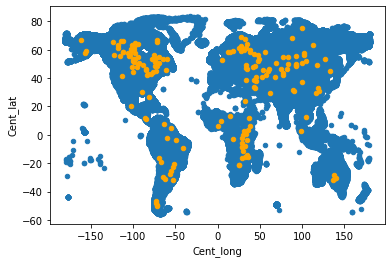

In [59]:
fig, ax = plt.subplots()
dat.plot.scatter("Cent_long", "Cent_lat", ax=ax)
dat1k.plot.scatter("Cent_long", "Cent_lat", ax=ax, color="orange")

In [60]:
(dat1h.groupby("Continent").count()['Lake_name']/dat.groupby("Continent").count()['Hylak_id'])*100

Continent
Africa           0.538712
Asia             0.338864
Europe           0.076608
North America    0.050701
Oceania          0.259663
South America    0.181320
dtype: float64

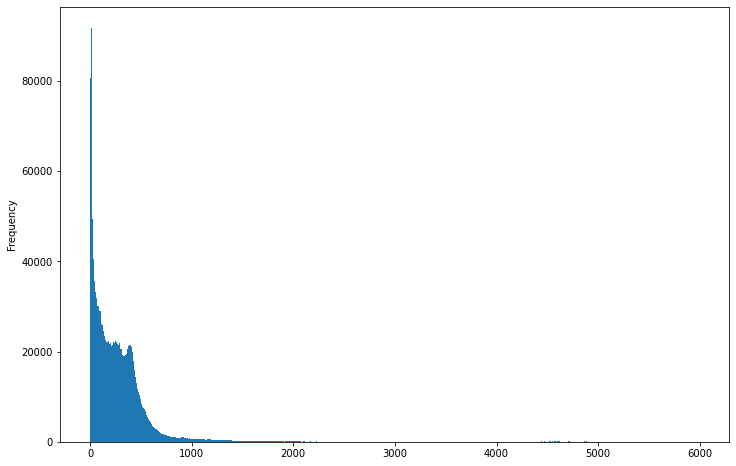

In [69]:
fig, ax = plt.subplots(figsize=(12,8))
dat["Elevation"].plot.hist(ax=ax, bins=np.arange(0,6000,10))


In [71]:
import seaborn as sns

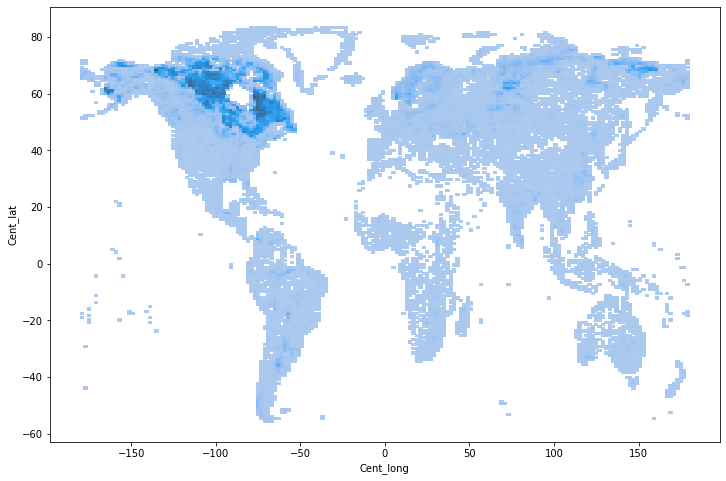

In [73]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=dat, x="Cent_long", y="Cent_lat", bins=180, ax=ax)

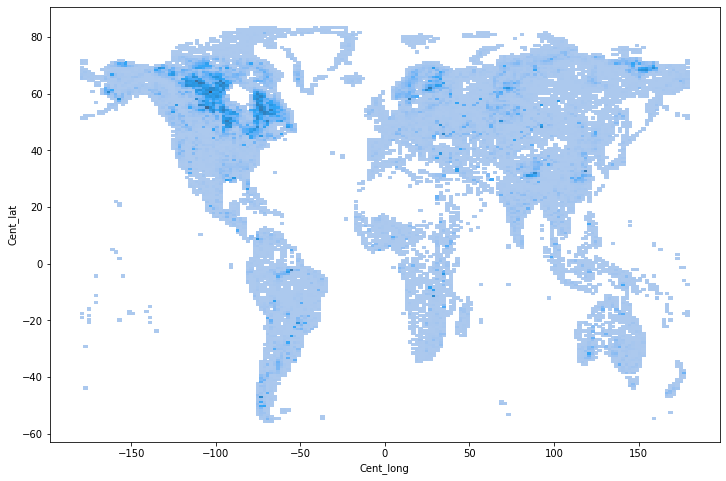

In [75]:
fig, ax = plt.subplots(figsize=(12,8))
dat.sort_values("Lake_area", ascending=False, inplace=True)
sns.histplot(data=dat.iloc[100:], x="Cent_long", y="Cent_lat", weights="Lake_area", bins=180, ax=ax)

## Part 7.4.2 - Simple overviews and statistics


In [ ]:
# ideas:
'''
- total area, compared to land area and global surface area
- total volume, compared to something?
- top lakes by area, depth, other stats?
- etc.
'''

## Part 7.4.3 - Advanced analyses and visualisations

In [ ]:
# ideas:
'''
- where is the water surface concentrated?
- where are the shorelines concentrated?
- where is the water volume concentrated?

- relationships between parameters: depth, area, shoreline, residence time, location, etc.

'''